**Scientific Computation (MKP3303)**


>> R.U.Gobithaasan (2021). Scientific Computing, Lectures for Undergraduate Degree Program B.Sc (Applied Mathematics), Faculty of Ocean Engineering Technology & Informatics, University Malaysia Terengganu.
https://sites.google.com/site/gobithaasan/LearnTeach

<p align="center">
     © 2021 R.U. Gobithaasan All Rights Reserved.

</p>



**Chapter 6: Solution of Equation: Differentiation**   

1. Limits 
2. Differentiation: derivatives and ODEs.                                                
3. Analytical Solutions of equation(s)
4. Numerical Solutions of equation(s)


References: 
-  [SciPy Lecture Notes](http://scipy-lectures.org/)
- Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).


In [1]:
from IPython.display import IFrame
doc = IFrame(src = 'https://docs.sympy.org/latest/modules/core.html?highlight=diff#sympy.core.function.diff', width=1155, height=400)
display(doc)

In [2]:
import sympy
print(sympy.__version__)

sympy.init_printing() # to print out mathematical equations

1.8


# Limits

- Natural phenomena can be represented in the form of **functions**, which may depend on one or many independent variables.
- **Limits** denotes the value of a function as one of its variables approaches a specific value or as the value of the variable approaches to negative or positive infinity. 

- We can use limits is to find the **asymptotic behavior** as a function.

- An example of a limit computations is
$\displaystyle \lim_{x\to \pi/2} f(x)%$, where $ f(x) = \tan(x)$

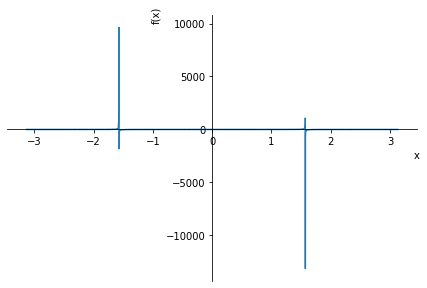

In [3]:
x = sympy.Symbol('x')
g1 = sympy.tan(x)
sympy.plot(g1, (x, -1 *sympy.pi, sympy.pi))
sympy.limit(g1, x, sympy.pi/2)

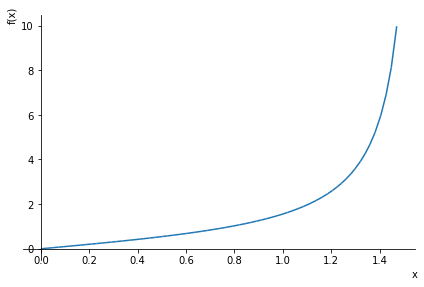

In [4]:
sympy.plot(g1, (x,0 , sympy.pi/2 -0.1))

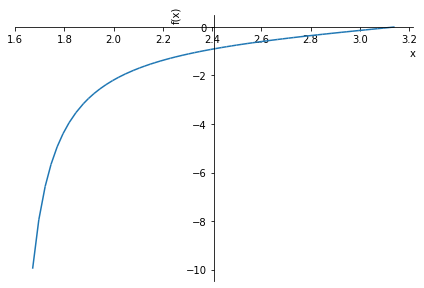

In [5]:
sympy.plot(g1, (x, sympy.pi/2 + 0.1, sympy.pi))

example: 

$\displaystyle \lim_{x\to 10} f(x)%$, where $f(x) = {\sinh (x)+1}$

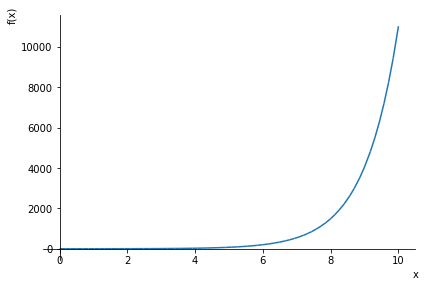

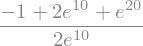

In [6]:
g2 = (sympy.sinh(x)+1)
sympy.plot(g2, (x, 0, 10))
sympy.limit(g2, x, 10)

In [7]:
sympy.N(_)

example: 

$\displaystyle \lim_{x\to \infty} f(x)%$, where $ f(x) = \tan(x)$, where $f(x) = \frac{\sinh (x)}{\exp (x)}$

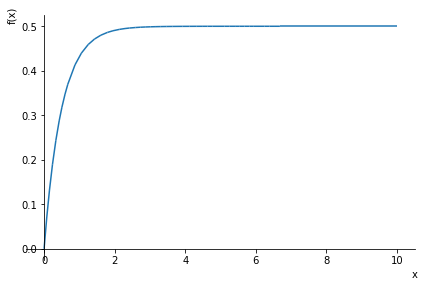

In [8]:
g3 = (sympy.sinh(x))/sympy.exp(x)
sympy.plot(g3, (x, 0, 10))
sympy.limit(g3, x, sympy.oo)

### Limit as Differentiation operator

- The rate of change of gradient for f(x), which also indicates the tangent direction: 
$$
\displaystyle \frac{d}{d x} f{\left(x \right)} =  \lim_{x\to 0} \frac{
\Delta y}{\Delta x}%$,
$$

- The definitions of the derivative is in fact can be represented in the form of limit:

$$
\displaystyle \frac{d}{d x} f{\left(x \right)} =  \lim_{h\to 0} \frac{(f(x + h) - f(x))}{h}%$,
$$


In [9]:
x, h = sympy.symbols("x, h")
f = sympy.Function('f')
limit_h = (f(x + h) - f(x))/h

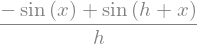

In [10]:
mydiff = limit_h.subs(f, sympy.sin)
mydiff

In [11]:
sympy.limit(mydiff,h,0)

# Differentiation: Derivatives

## Derivatives

 - Derivatives $\frac{d}{dx} f(x)$ are the rate of change of the function f(x) with respect to its independent variable x.
- We differentiate using `sympy.diff` or alternatively by using the diff method of SymPy expression instances. 
- The **order** of differentiation is the number of derivative respect to the independent variable.


###  Arbitrary functions with a single independent variable

- The argument to these functions is a number of symbols. For example, the first-order derivative of a function f (x) with respect to x:

In [12]:
x = sympy.Symbol('x')
f = sympy.Function('f')(x)
sympy.diff(f, x, 0) # original function wihout derivative computation

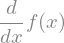

In [13]:
sympy.diff(f, x, 1) # first derivative computation

In [14]:
type(_)

sympy.core.function.Derivative

- Higher order: Two ways to compute the second-order derivative of a function f (x) with respect to x:

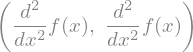

In [15]:
sympy.diff(f, x, x) , sympy.diff(f, x, 2)

- Higher order: Two ways to compute the third-order derivative of a function f (x) with respect to x:

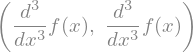

In [16]:
sympy.diff(f, x, x, x) , sympy.diff(f, x, 3)

#### Functions defined 

 -  example: $\frac{d}{d x} f{\left(x \right)}$, where $f(x) = sin(x)$

In [17]:
x = sympy.symbols('x')
f_sol = sympy.diff(sympy.sin(x), x,1)
f_sol

- We can always
double- check: 
$$
\int cos(x) dx  = sin(x) + C_1
$$
where $C_1$ is the integration constant.

In [18]:
sympy.integrate(f_sol)

In [19]:
x = sympy.symbols('x')
f1 = sympy.sin(x)
sympy.diff(f1, x,1)

In [20]:
f1.diff(x), f1.diff(x,2)  # short way

 - evaluating the derived function using `subs`

In [21]:
x = sympy.symbols('x')
f2 = 3*x**2
f2.diff(x,1)

In [22]:
_.subs(x, sympy.pi)

In [23]:
f2.diff(x).subs(x, sympy.pi) 

###  Functions with multiple variables

- the derivative of a function with several independent variables are called partial derivatives.

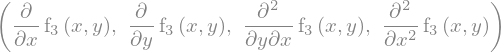

In [24]:
x,y = sympy.symbols('x,y')
f3 = sympy.Function('f3')(x,y)
sympy.diff(f3, x), sympy.diff(f3, y), sympy.diff(f3, x, y),  sympy.diff(f3, x, x)

$\frac{\partial}{\partial x} f_4(x,y) =(x + 1)^3 + xy ^ 2$

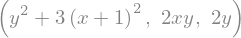

In [25]:
x,y = sympy.symbols('x,y')
f4 =(x + 1)**3 + x*y ** 2
sympy.diff(f4, x), sympy.diff(f4, y), sympy.diff(f4, x, y)

In [26]:
f4.diff(x,y)

### Delayed differentiation

 - declaring the derivatives with repsect to its variable

$cos(x) + xy^2$

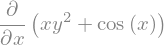

In [27]:
f5 = sympy.Derivative(sympy.cos(x) + x*y ** 2, x)
f5

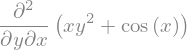

In [28]:
f6 = sympy.Derivative(sympy.cos(x) + x*y ** 2, x,y)
f6

 - evaluating the derivatives.

In [29]:
f5.doit(), f6.doit()

## Ordinary Differential Equation (ODE)

- Usually we do not know explicitly the function that represents a phenomena.
- We may only know substantial relations of the variables, which mainly focusing on how it changes; **rate of change with respect to its independent variables, hence we can represent this relation in the form of derivatives**.
- Any equations with unknown function defined in the form of derivatives called differential equations (DE).
- Different equations can be divided into two kinds:
> 1. **Ordinary Differential Equation**: unknown function with a single variable.
> 2. **Partial Differential Equation**: unknown function with several variables.
- In fact, ODE is a special type of PDE!
- The order of ODE an ODE is the highest derivative of the unknown function that appears in the equation.
- The **solution of ODE** is any function which satisfies the ODE. Thus, we may substitute the function along with its derivatives to inspect if it is true. 

Example: 
\begin{align*}
\frac{d}{d x} y(x) &= 2 x \\
y' &= 2 x \\
\Rightarrow y'- 2 x &= 0
\end{align*}

A standard way to represent the ODE is, in the form a function with x and y' as its argument:
$$
f(x,y') = y' - 2x 
$$

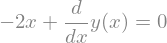

In [30]:
x = sympy.symbols("x")
y = sympy.Function("y")
ode1 = y(x).diff(x) - 2*x
sympy.Eq(ode1,0) # ODE equation = 0

In [31]:
ode_sol1 = sympy.dsolve(ode1)
ode_sol1 # C1 is the integration constant

In [32]:
type(ode_sol1)

sympy.core.relational.Equality

In [33]:
ode_sol1.free_symbols

- accessing left-hand-side (lhs) and right-hand-side (rhs) of the solution:

In [34]:
 ode_sol1.lhs , ode_sol1.rhs 

- check: 
\begin{align*}
\frac{d}{d x} y{\left(x \right)} &= \frac{d}{d x} (C_1 + x^2) \\
\Rightarrow  y' &= 2x 
\end{align*}

In [35]:
sympy.diff(ode_sol1.rhs,x) == 2*x

True

### First Oder ODE with an Initial condition: trivial example

- We need to use the given initial conditions (IC) to find the values of the integration constants. 


- **ODE order one:**

\begin{align*}
y'- 2x &= 0 \tag{1}\\
y' &= 2x \\
 \int y'\ dx &= \int 2x\ dx\\
\Rightarrow y{\left(x \right)} &= C_{1} + x^{2} \tag{2}
\end{align*}

- We can always verify the answer by substituting in the derived function back into the ODE: (2) into (1)

\begin{align*}
\frac{d}{dx}(C_{1} + x^{2}) - 2x &= 0\\
2x-2x =0
\end{align*}

-  How do we identify what is the integration constant $C_1$? 
- It depends on the given initial condition, for example:
given initial condition (IC): 
$$y(0) = y_0 \tag{3}$$

\begin{align*}
y(x) &= C_{1} + x^{2} \tag{1} \\
y(0) &= C_{1} \\
\Rightarrow C_{1} &= y_0 
\end{align*}

In [36]:
ode_sol1 # C1 is the integration constant

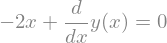

In [37]:
sympy.Eq(ode1,0)

example:    
$$y'- 2x = 0
$$
with initial condition (IC) as $y(0) = y_0$

In [38]:
ode_sol1.subs(x,0)


- Let the initial condition is $y(0) = y_0$, we describes the IC using a **dictionary**, which can be substituted later:
> `IC = {y(0):  y0}` 

In [39]:
y0 = sympy.Symbol('y0')
IC = {y(0): y0}
IC

 - substituting into analytical solution

In [40]:
y_eq = ode_sol1.subs(x, 0).subs(IC)
y_eq

- solving for $C_1$

In [41]:
c1 = sympy.solve(y_eq)
c1

- substituting $C_1$ into analytical solution

In [42]:
y_sol = ode_sol1.subs(c1[0])
y_sol

### **Direction Field for order 1 ODE** 
by Robert Johansson, Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib (2019, Apress).

- We can produce the direction field graphs for the ODEs on the form $\frac{dy(x)}{dx} = f (x,y(x))$ 



For example, the following code generates the direction field
dx
graphs for f (x, y(x)) = y(x)2+x, f (x, y(x)) = − x/y(x), and f (x, y(x)) = y(x)2/x. The result is shown in Figure 9-2

In [43]:
import matplotlib.pyplot as plt

def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
        f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
        x_vec = np.linspace(x_lim[0], x_lim[1], 20)
        y_vec = np.linspace(y_lim[0], y_lim[1], 20)
        
        if ax is None:
            _, ax = plt.subplots(figsize=(4, 4))
             
        dx = x_vec[1] - x_vec[0]
        dy = y_vec[1] - y_vec[0]
        
        for m, xx in enumerate(x_vec):
            for n, yy in enumerate(y_vec):
                Dy = f_np(xx, yy) * dx
                Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
                Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
                ax.plot([xx - Dx/2, xx + Dx/2],
                        [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
        
        ax.axis('tight')
        ax.set_title(r"$%s$" %
                    (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                    fontsize=18)
        return ax

Example: 
\begin{align*}
\frac{d}{d x} y(x) &= 2 x \\
\end{align*}

In [44]:
y0 = sympy.symbols("y0")
y = sympy.Function("y")
y_sol.subs(y0,1)
y_x = sympy.lambdify(x, y_sol.rhs.subs(y0,1),'numpy')

y_sol.subs(y0,1), y_x(-3), y_x(6)

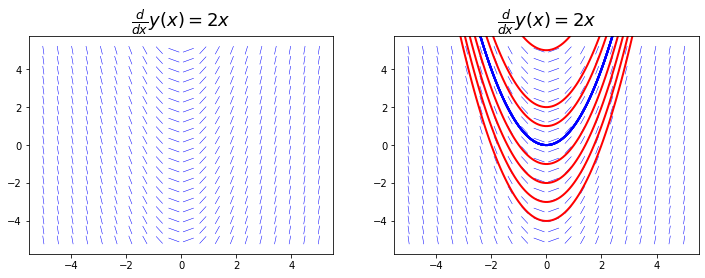

In [45]:
import numpy as np
x_vec = np.linspace(-4, 4, 100)
x, y0_val = sympy.symbols("x,y_val")
y = sympy.Function("y")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_direction_field(x, y(x), 2*x, ax=axes[0]);
plot_direction_field(x, y(x), 2*x, ax=axes[1]);
y0, y0_val= sympy.symbols('y0,y0_val')

for y0_val in [-4, -3, -2, -1,  1, 2, 5]:
    y_x = sympy.lambdify(x, y_sol.rhs.subs(y0,y0_val))
    axes[1].plot(x_vec, y_x(x_vec), 'r', lw=2)
    axes[1].plot(x_vec, sympy.lambdify(x, y_sol.rhs.subs(y0,0))(x_vec), 'b', lw=2)
    

Example: ODE Order one
\begin{align*}
\frac{d}{d x} y{\left(x \right)} = x + y^{2}{\left(x \right)}\\
\Rightarrow f (x,y(x)) = x + y^{2}
\end{align*}

- One way to inspect the solution is, we investigate the direction field

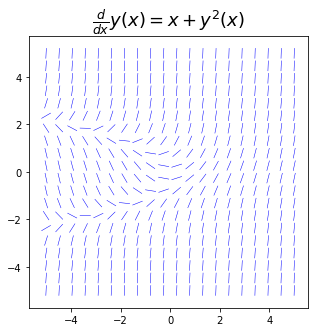

In [46]:
x = sympy.symbols("x") # independent variable
y = sympy.Function("y") # dependent
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes);

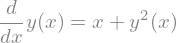

In [47]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)


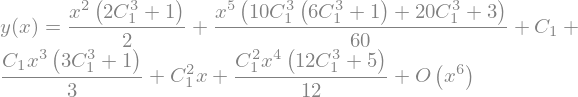

In [48]:
sympy.dsolve(y(x).diff(x) - f)

---
#### No analytical solution: ODE order two

Example: 
\begin{align*}
\frac{d^{2}}{d x^{2}} y{\left(x \right)} = x + y^{2}{\left(x \right)}\\
\end{align*}

In [49]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

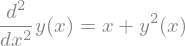

In [50]:
sympy.Eq(y(x).diff(x, x), f)

In [51]:
#sympy.dsolve(y(x).diff(x, x) - f)
#NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

### Numerical Solution with SciPy

- There are many approaches to solving ODEs numerically, for example,, Euler and Runge-Kutta's method. 

- We write ODEs on the standard form:
$$
\frac{d}{d x} y{\left(x \right)} = f (x,y(x)), 
$$
where y(x) is a array of unknown dx functions of x. 

- SciPy provides functions for the numerical integration of ODE problems. SciPy provides two ODE solver interfaces:
     1. `integrate.odeint`: based on [LSODA solver from ODEPACK](http://computation.llnl.gov/casc/odepack) (Adams predictor-corrector  and BDF method), 
         - easier to use.
     2. `integrate.ode`: based on various solvers: [VODE, ZVODE, LSODA and etc.](http://www.netlib.org/ode) (fourth- and eighth- order Dormand-Prince methods (i.e., types of Runge-Kutta methods) with adaptive stepsize).
         - object-oriented interface more flexible.

In [52]:
from scipy import integrate
#integrate.odeint?

Example: 
$$
f (x,y(x)) = x + y^{2}
$$

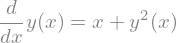

In [53]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

In [54]:
import numpy as np
from scipy import integrate

f_np = sympy.lambdify((y(x), x), f) # a function of two arguments: f_np(y,x)

In [55]:
f_np(2,0), f_np(2,2),

In [56]:
y0 = 0 # Initial condition y(0)=0
#points to compute:  x is positive
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp) # SciPy's numerical ODE computation

In [57]:
#yp

In [58]:
#points to compute:  x is negative
xm = np.linspace(0, -5, 100) 
ym = integrate.odeint(f_np, y0, xm)

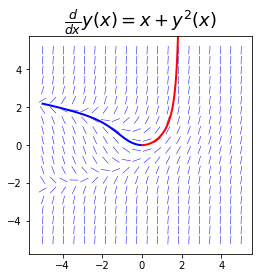

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

### Higher order ODE

**example: ODE Order 2:**     
$$y''- 3 x^2 = 0
$$
with initial conditions: 
> 1. $y(0) = y_0$,  
> 2. $y'(0) = y_1$ 

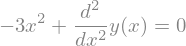

In [60]:
x, y, y0, y1 = sympy.symbols("x, y, y_0, y_1")
y = sympy.Function("y")
ode2 = y(x).diff(x,2) - 3*x**2
sympy.Eq(ode2,0)

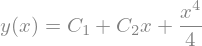

In [61]:
ode_sol2 = sympy.dsolve(ode2)
ode_sol2 # C1 & C1 are integration constants

- Since we derived the general solution as $y(x)$, we can substitute IC into this equation to solve for $C_1$ and $C_2$:
\begin{align*}
y(x) &= C_{1} + C_{2} x + \frac{x^{4}}{4} \\
IC1: y(0) &= C_{1} \\
\Rightarrow C_{1} &= y_0 
\end{align*}


\begin{align*}
y(x) &= C_{1} + C_{2} x + \frac{x^{4}}{4} \\
y'(x) &= C_{2} + 3x^{3} \\
IC2: y'(0) &= C_{2} \\
\Rightarrow C_{2} &= y_1 
\end{align*}

- declare initial conditions as dict

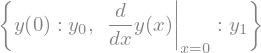

In [62]:
IC2 = {y(0): y0, y(x).diff(x).subs(x, 0): y1}
IC2

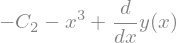

In [63]:
ode_sol2.lhs.diff(x, 1)-ode_sol2.rhs.diff(x, 1)

In [64]:
ode_sol2.lhs.diff(x, 0)- ode_sol2.rhs.diff(x, 0).subs(x,0).subs(IC2)

In [65]:
ode_sol2.lhs.diff(x, 0)

- general equation setup to solve integration constant $C_i$

In [66]:
sol = ode_sol2 # your analytical solution
eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(IC2) for n in range(len(IC2))]
eqs

- solving for $C_i$

In [67]:
c_sol2 = sympy.solve(eqs, ode_sol2.free_symbols)
c_sol2 

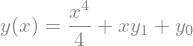

In [68]:
ode_sol2.subs(c_sol2)

<div class="alert alert-block alert-success">
<b>Take note:</b> To solve this method numerically using SciPy, first you need to express second order ODE into a system of first order.
</div>

- See [SciPy Notes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) for an example of **the second order differential equation for the angle theta of a pendulum acted on by gravity with friction**


---
# Analytical Solution of Equation(s)

- We can classify equations based the **number of independent variables:**
1. single : univariate, $f(x)$, where $x$ is an independent variable. If we apply differentiation, we may end up with an ODE.
2. more than one : multivariate, $f(x_1,x_2, x_i)$, where $x_1,x_2, x_i$ are independent variables. If we apply differentiation, we may end up with a PDE.

- We may further classify the type of equation or in genereal, the functions into:
1. **linear equations**: we can express them into a summation of its terms; visually it is a **straight line in 2D or a plane in 3D;  a hyperplane in $R^d$**.
2. **nonlinear equations**: the independent variables $x_i^{\alpha}$ are usually with $\alpha \neq 0$.


- There are either analytical or numerical approach of finding a solution for a given function in Python. 
- A collection of functions are called a system. Linear systems usually can be solved analytically using SymPy or SciPy, otherwise we will try to use numerical approach to solve the system.

- Below are the modules that we will go through:
> 1. Linear Systems: SymPy / SciPy : `scipy.linalg`
> 2. Nonlinear Systems: SciPy: `scipy.optimize`


In [69]:
from IPython.display import IFrame
doc = IFrame(src = 'https://docs.sympy.org/latest/modules/solvers/solvers.html', width=1155, height=400)
display(doc)

In [28]:
import sympy
print(sympy.__version__)

sympy.init_printing() # to print out mathematical equations

1.8


- We can solve linear and nonlinear equation with `sympy.solve()` analytically.

- Simple equation: 
\begin{align*}
2x &= 3\\
\Rightarrow f(x): 2x-3 &= 0 \\
\Rightarrow LHS -RHS&= 0
\end{align*}

## Single Variable

In [29]:
x = sympy.symbols("x")
eq1 = 2*x-3;
sol1 = sympy.solve(eq1)
sol1a = sympy.solve(eq1,x)
sol1b = sympy.solve(eq1,x, dict=True)

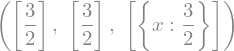

In [72]:
sol1, sol1a, sol1b

- two ways to verify your answer: 

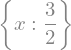

In [32]:
sol1b[0]

In [74]:
 eq1.subs(sol1b[0]) 

In [33]:
sympy.checksol(eq1, {x:3/2}) #checksol verifies if the expression is zero

True

In [34]:
sympy.checksol(eq1,sol1b[0])

True

### Linear equations

Algebraic simplification of a linear equation:
\begin{align*}
\frac{ax}{b} &= c\\
\Rightarrow f(x): \frac{ax}{b}-c &= 0 \\
\end{align*}
where $a,b,c \in R$.

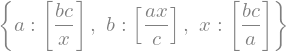

In [76]:
x,a,b,c = sympy.symbols("x,a,b,c")
eq2 = a*x/b - c ;
{a: sympy.solve(eq2,a), b: sympy.solve(eq2,b), x: sympy.solve(eq2,x)}

- Inequality function: $\frac{ax}{b} > c \, \text{and} \, x>0  $
- For Mathematica, use `Reduce[]`

In [77]:
x,a,b,c = sympy.symbols("x,a,b,c")
sympy.solve([ x < 2, x > -2],x)

In [78]:
x,a,b,c = sympy.symbols("x,a,b,c")
sympy.solve([ 0 < x, x < 2, x > 1],x)

- finding more than a single variable.

\begin{align*}
f(x): x+b +\sqrt{a} &= 0\\
\Rightarrow  x+b &= ? \\
\end{align*}

In [79]:
x,a,b = sympy.symbols("x,a,b")
sympy.solve(x + b - sympy.sqrt(a), x + b)

In [80]:
sympy.solve((a + b)*x - b + 2, a, b)

### Nonlinear equation

- a quadratic equation: $f(x) = ax^2 + bx + c$,  where $a,b,c \in R$.

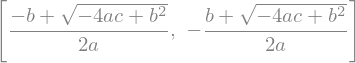

In [35]:
x,a,b,c = sympy.symbols("x,a,b,c")
quadratic_eq = a * x**2 + b * x + c
sol_quad = sympy.solve(quadratic_eq, x)
sol_quad

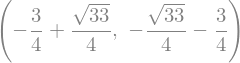

In [82]:
vals = {a: 2, b: 3, c: -3}
sol_quad[0].subs(vals),sol_quad[1].subs(vals)

- a trigonometric equation: $f(x) = a sin(x) - b cos(x)$,  where $a,b\in R$.

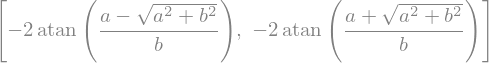

In [83]:
x,a,b = sympy.symbols("x,a,b")
sympy.solve(a* sympy.sin(x) - b *sympy.cos(x), x)

- A root of a polynomial P(x) is a number $x_i$ such that $P(x_i)=0$. 
- The fundamental theorem of algebra states that **a polynomial P(x) of degree n has n roots**, some of which may be degenerate. 
- Finding roots of a polynomial is therefore equivalent to polynomial factorization into factors of degree 1.
- Solving a polynomial: $\left(x^{2} - 2\right) \left(x^{2} + 1\right) = 0$, We can have to up to four roots.

- See an example of my work at [Mathematica Website](https://demonstrations.wolfram.com/CurvatureExtremaForConstrainedBezierCurves/) solving the root on a quintic equation (degree 5).

In [84]:
x = sympy.symbols("x")
poly = sympy.Eq((x**2 + 1)*(x**2 - 2),0)
poly

In [85]:
poly.lhs.expand()

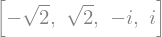

In [86]:
sympy.solve((x**2 + 1)*(x**2 - 2) , x)

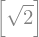

In [87]:
x = sympy.symbols("x", positive =True) # to get only positive value
sympy.solve((x**2 + 1)*(x**2 - 2) , x)

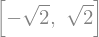

In [88]:
x = sympy.symbols("x", real =True) # to get only real values
sympy.solve((x**2 + 1)*(x**2 - 2) , x)

## Solution for systems of equation

### Linear Systems: Solving with SciPy (Matrix Representation A.x =b)

$$
 x_1 + 3 x_2 = 4
$$

$$
5 x_1  - x_2 = 3
$$

- We can represent a system of (linear) equations above in a matrix form of $A.x =b$

In [12]:
import numpy as np

A = np.array([[1, 3], [5, -1]])
print('Matrix A = ', A)

b = np.array([[4], [3]])
print('Matrix b = ', b)

Matrix A =  [[ 1  3]
 [ 5 -1]]
Matrix b =  [[4]
 [3]]


- When we are solving an equation system Ax = b, we are not computing the inverse of A to solve, as its time consuming.


- We instead use LUsolve method, which performs the LU (Lower Upper) factorization internally and solves the equation system using those factors. 

1. Let's compute **LU decomposition** of Matrix A. We need scipy.linalg to do this

$$
\begin{eqnarray*}
A = \begin{bmatrix}
1 & 3 \\
5 & -1 \\
\end{bmatrix} & =& \begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}* \begin{bmatrix}
1 & 0 \\
0.2 & 1 \\
\end{bmatrix}*\begin{bmatrix}
5 & -1 \\
0 & 3.2 \\
\end{bmatrix} \\ 
&&\\
& = & P. L . U
\end{eqnarray*}$$

In [22]:
from scipy import linalg

P, L, U = linalg.lu(A)
P, L , U # diagonal, lower, upper matrices

(array([[0., 1.],
        [1., 0.]]),
 array([[1. , 0. ],
        [0.2, 1. ]]),
 array([[ 5. , -1. ],
        [ 0. ,  3.2]]))

- We can in the decomposition as follows:

In [23]:
np.dot(L,U) # we have obtained A, but need to times back P

array([[ 5., -1.],
       [ 1.,  3.]])

In [18]:
 P.dot(np.dot(L,U))

array([[ 1.,  3.],
       [ 5., -1.]])

- Let $UX =Y$, for the vector Y as:
\begin{eqnarray*}
Y = \begin{bmatrix}
y_1  \\
y_2 \\
\end{bmatrix} 
\end{eqnarray*}

- SO, $AX = PL(UX) = PLY = b$, Hence, the next step is to solve $PLY=b$, 

$$
\begin{eqnarray*}
PLY = \begin{bmatrix}
0.2 & 1 \\
1 & 0 \\
\end{bmatrix}  \begin{bmatrix}
y_1  \\
y_2 \\
\end{bmatrix} & =  & \begin{bmatrix}
4 \\
3 \\
\end{bmatrix} & = & b
\end{eqnarray*}$$

- We can solve the $LY = b$ using forward substitution, where $y_1 =3$ and $y_2 =3.4$ 

- Now that we have found Y, we solve $UX = Y$ for X. That is we solve

$$
\begin{eqnarray*}
UX = \begin{bmatrix}
5 & -1 \\
0 & 3.2 \\
\end{bmatrix}  \begin{bmatrix}
x_1  \\
x_2 \\
\end{bmatrix} & =  & \begin{bmatrix}
3. \\
3.4 \\
\end{bmatrix} & = & y
\end{eqnarray*}$$

- We can solve the $UX = y$ using backward substitution, where $x_2 = \frac{3.4}{3.2}$ and $x_1 = (3+ \frac{3.4}{3.2})/5$ 

In [13]:
from scipy import linalg
x1,x2 = linalg.solve(A,b)
print(x1)
print(x2)

[0.8125]
[1.0625]


### Linear Systems: Solving with SimPy (functions as expressions)

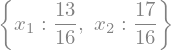

In [108]:
x1,x2 = sympy.symbols("x1,x2")
LinEq1 = x1 + 3*x2 - 4
LinEq2 = 5*x1 - x2 - 3
LinSol1 = sympy.solve((LinEq1, LinEq2 ), x1, x2)
LinSol1

In [109]:
sympy.checksol([LinEq1,LinEq2], LinSol1)

True

In [100]:
x,y,z = sympy.symbols("x,y,z")
LinEq3 = x + 5*y - 2
LinEq4 = -3*x + 6*y - z
LinSol2 = sympy.solve((LinEq3, LinEq4), z, x, y)
LinSol2

- The solution has many solution where $y \in R$

In [101]:
sympy.checksol([LinEq1,LinEq2], LinSol1)

True

 - linear system with **no solution**

In [113]:
sympy.solve([2*x + 3, x - 2],x)

### Linear Systems: Solving with SimPy (Linear System as Matrix representation)

$$
 x_1 + 3 x_2 = 4
$$

$$
5 x_1  - x_2 = 3
$$

In [110]:
Linsys1 = sympy.Matrix(( (1, 3, 4), (5, -1, 3)))

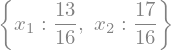

In [112]:
sympy.solve_linear_system(Linsys1, x1, x2)

### Linear Systems: Solving with SimPy (Linear System as Matrix representation A.x = b using LU Decomposition)

In [116]:
A = sympy.Matrix([[1, 3], [5, -1]])
b = sympy.Matrix([[4], [3]])

In [118]:
L, U, _ = A.LUdecomposition()

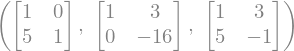

In [120]:
L, U, L*U

- two ways to solve

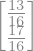

In [123]:
sol = A.solve(b)
sol

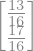

In [124]:
A.LUsolve(b)

# Lectures Notes to continue from here.

---
# Numerical Solution of Equation(s)

## Nonlinear Systems

In [ ]:
nonlinear_eq1 = x**2 + y - 2
nonlinear_eq2 = y**2 - 4
solnon1 =sympy.solve([nonlinear_eq1, nonlinear_eq2], x, y, set =True) # solution displayed int the form of tuple
solnon1

- two ways to verify your answer: 

In [ ]:
nonlinear_eq1.subs({x:-2,y:-2}), nonlinear_eq2.subs({x:-2,y:-2})

In [ ]:
sympy.checksol(nonlinear_eq1,{x:0,y:2} ), sympy.checksol(nonlinear_eq2,{x:0,y:2} )

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]


In [ ]:
root = fsolve(func, [1, 1])
root

In [ ]:
np.isclose(func(root), [0.0, 0.0])  # func(root) should be almost 0.0.